<a href="https://colab.research.google.com/github/SabinaIsmailovaMK/TP-MS/blob/master/Ismailova_les-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [180]:
import numpy as np
import pandas as pd

In [181]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [182]:
n = len(x)
n

10

In [183]:
b = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [184]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

In [185]:
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [186]:
df = pd.DataFrame({'x': x, 'y': y, 'y_hat': y_hat}, columns=['x', 'y', 'y_hat'])
df

,x,y,y_hat
0,35,401,535.896218
1,45,574,562.101607
2,190,874,942.079745
3,200,919,968.285134
4,40,459,548.998913
5,70,739,627.615079
6,54,653,585.686457
7,150,902,837.258190
8,120,746,758.642023
9,110,832,732.436634


График

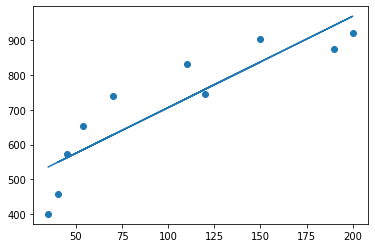

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
plt.plot(x,a+b*x)

In [188]:
mse_ = ((y-y_hat)**2).sum()/n
mse_

6470.414201176658

Intersept way


In [189]:
import seaborn as sns

In [190]:
x = x.reshape(1, n)
y = y.reshape(1, n)

In [191]:
x = np.vstack([np.ones((1, n)), x])

In [192]:
b = np.dot(np.dot(np.linalg.inv(np.dot(x, x.T)), x), y.T)
b

array([[444.17735732],
       [  2.62053888]])

# 2. 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [193]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [194]:
B1= 0.1

In [195]:
alpha= 1e-6

In [196]:
def mse_(B1, y=x, X=y, n=n):
    return np.sum((B1 * x - y) ** 2) / n

In [197]:
for i in range (10):
    B1 -=alpha*(2/n)*np.sum((B1*x-y)*x)
    print('B1={}'.format(B1))

B1=0.25952808
B1=0.414660650906144
B1=0.5655188230595969
B1=0.7122203698240712
B1=0.8548798195302346
B1=0.9936085448867542
B1=1.1285148499277806
B1=1.2597040545647504
B1=1.387278576808517
B1=1.5113380127259965


In [198]:
for i in range (1000):
    B1 -=alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%100 == 0:
        print('Iteration:{i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration:0, B1=1.6319792141937546, mse=5502.342728170939
Iteration:100, B1=5.629340281237233, mse=295243.4413452175
Iteration:200, B1=5.873885137561711, mse=327259.77611298114
Iteration:300, B1=5.888845554134484, mse=329271.9107861501
Iteration:400, B1=5.889760781170516, mse=329395.2064639799
Iteration:500, B1=5.889816771625289, mse=329402.7500203323
Iteration:600, B1=5.889820196929507, mse=329403.2115120719
Iteration:700, B1=5.8898204064778845, mse=329403.23974456615
Iteration:800, B1=5.889820419297334, mse=329403.2414717331
Iteration:900, B1=5.889820420081584, mse=329403.24157739524


In [199]:
mse_(5.88982)

329403.1849797219